# Predict audiobooks returning customers

I am building a model that analysises data from customers of an audiobook app to classify them as returning or not, in a boolean way. By "returning" I mean returning customers, i.e. if they will go back to using the app to purchase more products.
Methods used:
- NN
- SVM (as comparison)

The data are imported from an attached csv file, and is tables as follows:

| customer id | average minutes spent per book | total minutes spent on app  |average price of book   |total spent on app   |has left reviews?|review score|completion fraction| minutes listened |number of support requests|Last visited time minus purchase date| Target (dependent variable)|
|---------------|-------|---|---|---|---|---|---|---|---|---|---|
|   x   |   x    |  x | x  | x  |x|x|x|x|x|x|x|x|x|

### Methodology - SVM model

- importing the data: data shown as it is in a pandas dataframe, then imported from the csv files generated in the BC_preprocessing notebook;
- splitting into train and test datasets;
- definition of the model;
- testing of the model;

This work is based on an exercise from https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

%matplotlib inline

In [3]:
ab_ds = pd.read_csv("Audiobooks_data.csv")
ab_ds.columns = ['id','mins_avg','mins_tot','price_avg','price_tot','review','rev_score','completion','mins_listened','support_req','Last_visited_minus_purchase_date','Target']
ab_ds=ab_ds.assign(num_books=lambda x: x.mins_tot/x.mins_avg)
ab_ds.head()

,id,mins_avg,mins_tot,price_avg,price_tot,review,rev_score,completion,mins_listened,support_req,Last_visited_minus_purchase_date,Target,num_books
0,611,1404.0,2808,6.66,13.33,1,6.5,0.0,0.0,0,182,1,2.0
1,705,324.0,324,10.13,10.13,1,9.0,0.0,0.0,1,334,1,1.0
2,391,1620.0,1620,15.31,15.31,0,9.0,0.0,0.0,0,183,1,1.0
3,819,432.0,1296,7.11,21.33,1,9.0,0.0,0.0,0,0,1,3.0
4,138,2160.0,2160,10.13,10.13,1,9.0,0.0,0.0,0,5,1,1.0


## Balancing the dataset

## ...with np dataset as used with TF

In [4]:
shuffled_inputs = np.loadtxt("shuffled_inputs.csv", delimiter=',')
shuffled_targets = np.loadtxt("shuffled_targets.csv", delimiter=',')

### Splitting into train and test
80-20 partition

In [5]:
samples_count =  shuffled_inputs.shape[0]
train_samples_count=int(samples_count*0.8)

test_samples_count=samples_count-train_samples_count

train_inputs=shuffled_inputs[:train_samples_count]
train_targets=shuffled_targets[:train_samples_count]

test_inputs=shuffled_inputs[train_samples_count:train_samples_count+test_samples_count]
test_targets=shuffled_targets[train_samples_count:train_samples_count+test_samples_count]

### SVM model

In [6]:
X_set_svm = train_inputs[:,:]
audiobooks_bc_svm = svm.SVC(C=2,kernel='linear', degree=3,decision_function_shape='ovr') #define the svm model
audiobooks_bc_svm.fit(X_set_svm, train_targets) # fit the model

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Testing

In [7]:
pred_targets=audiobooks_bc_svm.predict(test_inputs)
print("SVM Accuracy: ", metrics.accuracy_score(test_targets, pred_targets))
print("Test set Jaccard similarity score: ", metrics.jaccard_similarity_score(test_targets, pred_targets))
print("Test set F1 score: ", metrics.f1_score(test_targets, pred_targets))

SVM Accuracy:  0.8994413407821229
Test set Jaccard similarity score:  0.8994413407821229
Test set F1 score:  0.8991031390134528


C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [8]:
confusion_matrix(test_targets, pred_targets)

array([[404,  49],
       [ 41, 401]], dtype=int64)

### Feature importance

In [11]:
audiobooks_bc_svm.coef_[0]

array([-1.41000860e+00,  2.43886524e+00, -1.20484855e+00,  1.82182452e+00,
        6.69336040e-01,  9.83585832e-03, -1.07737904e+01, -1.53244800e+00,
        1.06239093e+00,  1.10540996e-01])

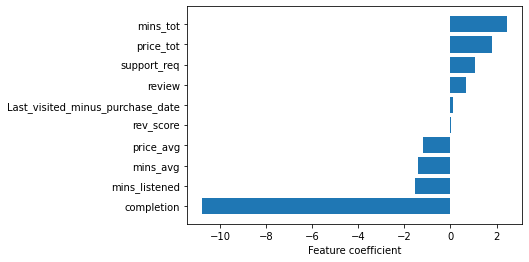

In [15]:
features_names = ['mins_avg','mins_tot','price_avg','price_tot','review','rev_score','completion','mins_listened','support_req','Last_visited_minus_purchase_date']

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xlabel('Feature coefficient')
    plt.savefig('Feature coefficients.png')
    plt.show()


f_importances(audiobooks_bc_svm.coef_[0], features_names)